In [17]:
import gensim
from gensim.models import KeyedVectors

from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
import os
import pandas as pd

In [18]:
path_glove = os.path.abspath('glove.twitter.27B.25d.txt/glove.twitter.27B.25d.glove.txt')
path_w2v = os.path.abspath('glove.twitter.27B.25d.txt/glove.twitter.27B.25d_w2v.txt')
glove_file = datapath(path_glove)
tmp_file = get_tmpfile(path_w2v)


In [19]:
glove_file

'C:\\Users\\akhil\\Downloads\\glove.twitter.27B.25d.txt\\glove.twitter.27B.25d.glove.txt'

In [22]:
_ = glove2word2vec(glove_file, tmp_file)

<ipython-input-22-f93949e0cb52>:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [23]:
path = os.path.abspath('glove.twitter.27B.25d.txt\glove.twitter.27B.25d_w2v.txt')

model = KeyedVectors.load_word2vec_format(path, binary=False)

In [28]:
def pp(obj):
    print(pd.DataFrame(obj))
    
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]

countries = ['australia', 'canada', 'germany', 'ireland', 'italy']
foods = [analogy('us', 'hamburger', country) for country in countries]
pp(zip(countries,foods))


           0          1
0  australia    пуховик
1     canada   barbecue
2    germany    пуховик
3    ireland  schnitzel
4      italy   couscous


# Principal Component Analysis

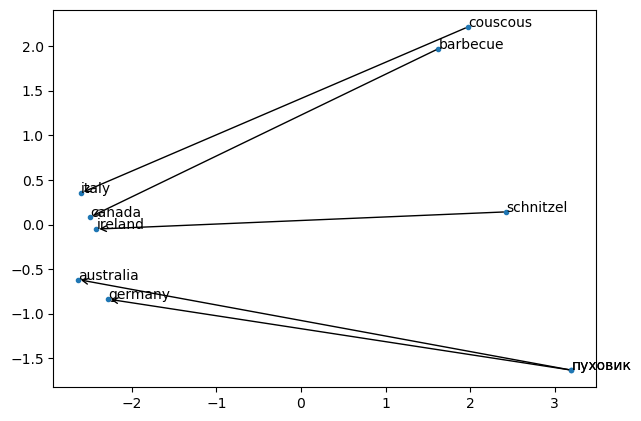

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )
       
labels = countries + foods
data = [model[w] for w in labels]
plot_data(data, labels)

In [30]:
x = analogy('dog','puppy','cat')
print(x)

kitten


In [32]:
dataset = pd.read_csv("Word_Analogies.csv")

In [33]:
dataset.head()

,Athens Greece Baghdad Iraq
0,Athens Greece Bangkok Thailand
1,Athens Greece Beijing China
2,Athens Greece Berlin Germany
3,Athens Greece Bern Switzerland
4,Athens Greece Cairo Egypt


In [37]:
t =0
j =0
i = 0
ans = []
pred_ans = []
for x in dataset:
    for z in dataset[x]:
        k = z.split()
        if len(k)==4:
            if(model.__contains__((k[0].lower())) and model.__contains__((k[1].lower())) and model.__contains__((k[2].lower()))):
                    h = analogy(k[0].lower(),k[1].lower(),k[2].lower())
                    testy = (k[3].lower())
                    i+=1;
                    if h==testy:
                        j+=8
print((j/i)*100)

93.33039841514417
